<a href="https://colab.research.google.com/github/hooroobaby/DSonCyberSecurity/blob/main/111356043_H_PEimageCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework PE image by CNN

Copy this file to your own Google Drive now!


Answer #0:


Your name: 林驊萱

Student ID: 111356043

Department: 資管碩一

# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### Get pefiles



In [ ]:
!wget https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw -O pefiles.pickle

--2023-05-09 18:58:07--  https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw
Resolving drive.google.com (drive.google.com)... 74.125.204.102, 74.125.204.101, 74.125.204.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iodk9frqvc8lh7jglq0f5gr1rdh2uuse/1683658650000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw?uuid=cd1876be-19f1-4ee0-9df9-e182b9a84454 [following]
--2023-05-09 18:58:11--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iodk9frqvc8lh7jglq0f5gr1rdh2uuse/1683658650000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw?uuid=cd1876be-19f1-4ee0-9df9-e182b9a84454
Resolving doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to doc-0c

In [ ]:
!ls -al

total 292
drwxr-xr-x 1 root root   4096 May  9 18:58 .
drwxr-xr-x 1 root root   4096 May  9 18:55 ..
drwxr-xr-x 4 root root   4096 May  8 13:36 .config
-rw-r--r-- 1 root root 282207 May  9 18:58 pefiles.pickle
drwxr-xr-x 1 root root   4096 May  8 13:37 sample_data


### load training data

In [ ]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd) # 讀取序列化資料
  return (tu[0], tu[1])

In [ ]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [ ]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.
# 範例程式碼解釋
# train_images和train_labels陣列是訓練集——模型用於學習的資料。
# 影象是28x28 NumPy陣列，畫素值從0到255不等。

In [ ]:
# our data includes 11 different malware families
class_names = ['Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar', 'Gepys.A', 'Bulta!rfn', 'Zbot',
               'GameVance', 'Zegost.B', 'Bifrose.AE', 'Zbot!GO']
len_classes = len(class_names)

print(len_classes)

11


### Explore the data

In [ ]:
# We have 356 malware pefiles, and each of them is represented as a 28x28 byte array.
train_images.shape

(356, 28, 28)

In [ ]:
# The lenght of the label is 356 as well.
len(train_labels)

356

In [ ]:
# Each label is an integer (ranging from 0 to 10).
# The 1st malware's label is 5.
# It stands for that the 1st malware belongs to the family labeded by 5.
# See class_names. Its index starts from 0.
train_labels

array([ 5,  4,  2,  6,  3,  7,  2,  3,  0,  2,  2,  3,  7,  3,  3,  3,  2,
        2,  7,  9,  5,  1,  4, 10,  2,  4,  0,  6,  2,  6,  2,  3,  4,  2,
        2,  2,  6, 10,  2,  3,  2,  0,  2,  3,  4,  0, 10,  3,  2,  4,  2,
        2,  2,  9,  2,  5,  0,  5,  4,  3,  0,  2,  3,  3,  2,  3,  1,  2,
        0,  4,  3,  4,  3,  2,  3,  1,  4,  2,  0,  1,  6,  4,  3,  4,  2,
        3,  2,  5,  7,  2,  3,  3,  8,  5,  6,  4,  4,  0,  3,  6,  0,  3,
        7,  4,  9,  6,  2,  3,  4,  4,  1,  2, 10,  4, 10,  4,  3,  6,  8,
        4,  0,  0,  0,  9,  3,  4,  1,  2,  0,  2, 10,  3,  2,  3,  2,  2,
        4,  3,  3,  4,  2,  3,  2,  0,  8,  6,  2,  2, 10,  3,  0,  4,  5,
        5,  0,  3,  9,  9,  2,  0,  1,  5,  0,  6,  6,  6,  3,  9,  6, 10,
        3,  6,  8,  2,  4,  0,  3,  3,  6,  5,  4,  4,  4,  2,  3,  1,  1,
       10,  3,  3,  5,  3,  2,  6,  3,  8,  2,  2,  0,  0,  7,  2,  3,  3,
        1,  9,  4,  0,  3,  3,  0,  7,  4,  2,  5,  5, 10,  8,  6,  4,  0,
        3,  4,  4,  2,  0

In [ ]:
# An example of first (indexed by 0) PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90,  80,   0,   2,   0,   0,   0,   0,   0,  15,   0, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,
         26,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 124,   0,   0,   0, 186,  16,   0,  14,  31,
        180,   9, 205,  33, 184,   1,  76, 205,  33, 144, 144,  84, 104,
        105, 115],
       [ 32, 112, 114, 111, 103, 114,  97, 109,  32, 109, 117, 115, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 117, 110, 100, 101, 114,
         32,  87],
       [105, 110,  51,  50,  13,  10,  36,  55,   0,   0,   0,   0,  80,
         69,   0,   0,  76,   1,   4,   0, 254, 114,  22,  79,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 224,   0,  15,   1,  11,   1,  10,   0,   0,
         22,   0,   0,   0, 184,   5,   0,   0,   0,   0,   0, 180,  20,
          0,   0],
       [  

### Preprocess the data

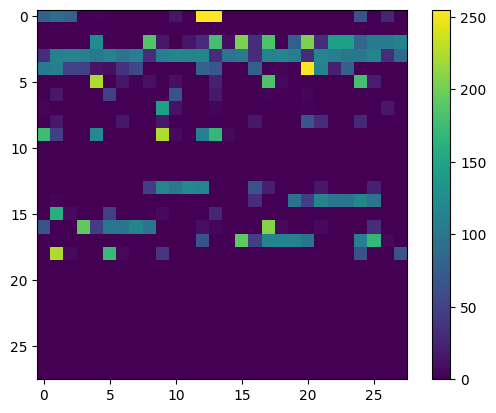

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we can view the first 28x28 bytes of a PE file as an image.
# A byte with value 0 (or '0x00') has darkest color,
# while a byte with value 255 (or '0xFF') has brightest color.
# Below is the visualization of the first PE file.

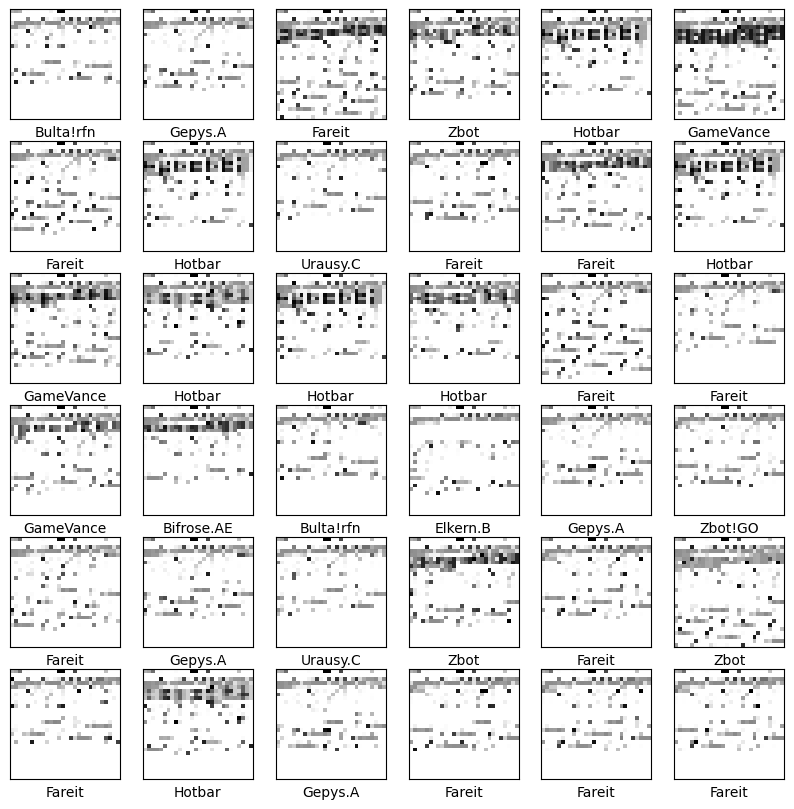

In [ ]:
# Here are the examples of 36 PE files,
# presented as 28x28 images.
# However, I use 'plt.cm.binary' to show only grey-scale color.
# You may try the following page to change to other colors.
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #Display data as an image
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

### Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [ ]:
# Any preprocessing?
# 將這些值縮放到0到1的範圍
train_images = train_images/255.0

### Build the model

In [ ]:
# This is the model from tensorflow's example.
# Please try to modify it.
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes)
])
'''

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(len_classes)\n])\n"

In [ ]:
model = keras.Sequential(
    [
        # 第一步驟：Convolution Operation & Pooling
        keras.Input(shape=(28, 28,1)),
        keras.layers.Conv2D(64,3, padding="same", activation="relu"),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(128,3, padding="same", activation="relu"),
        keras.layers.MaxPooling2D(),
        # 第二步驟：Flatten：將feature maps攤平放入一個向量中
        keras.layers.Flatten(),
        # 第三步驟：
        keras.layers.Dense(128, activation="relu"), #(幾個神經元,用什麼激活函式) 72xx/10-->720(512)
        keras.layers.Dropout(0.2), # 避免overfitting
        keras.layers.Dense(len_classes, activation="softmax")
    ]
)

# 顯示 Model output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
# This is the training sonfig from tensorflow's example.
# Please try to modify it.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'? Is "SGD" good enough? (what if not?)

#### A2:

因為output是維度為len_classes的向量，所以每個元素都表示一個數字的機率，而不是0或1的標籤。且資料集各個樣本有自己屬於的類別，因此用SparseCategoricalCrossentropy結果較好。

將from_logits設為True，表示算出的loss會再經過keras logits轉換為機率。目前adam是最好的優化器，用了也發現比較好

### Train the model

In [ ]:
# This is the fitting function from tensorflow's example.
# Please try to modify it.

model.fit(train_images, train_labels, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 3s 97ms/step - loss: 2.0723 - accuracy: 0.3371
Epoch 2/20
12/12 [==============================] - 1s 96ms/step - loss: 1.6045 - accuracy: 0.4494
Epoch 3/20
12/12 [==============================] - 1s 98ms/step - loss: 1.2725 - accuracy: 0.5478
Epoch 4/20
12/12 [==============================] - 1s 98ms/step - loss: 1.0232 - accuracy: 0.6826
Epoch 5/20
12/12 [==============================] - 1s 95ms/step - loss: 0.7871 - accuracy: 0.7331
Epoch 6/20
12/12 [==============================] - 1s 96ms/step - loss: 0.6196 - accuracy: 0.8090
Epoch 7/20
12/12 [==============================] - 1s 95ms/step - loss: 0.5290 - accuracy: 0.8371
Epoch 8/20
12/12 [==============================] - 1s 124ms/step - loss: 0.4668 - accuracy: 0.8567
Epoch 9/20
12/12 [==============================] - 2s 171ms/step - loss: 0.4614 - accuracy: 0.8624
Epoch 10/20
12/12 [==============================] - 1s 109ms/step - loss: 0.3404 - accuracy: 0.9129
Epoch 11/20
12/12

### Q3: What is 'epochs'? How does it affect the result?

#### A3:
指整個訓練集的循環次數。每個epoch時，NN會對訓練資料集進行一次傳播以更新權重和偏差。因此越多epoch，模型就有越多機會被訓練，而提高訓練精度。
- 但如果epoch數量太大，模型可能會overfitting於trainning data。
- 如果太小，又沒有足夠時間學習，導致underfitting。

*--> epoch 5->10->20越來越好，但後面就持平，也導致訓練時間變長，所以不是越多越好*

### Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

#### A4:
將訓練data分為訓練集和驗證集的比例。可用於評估模型在不同數據集上的性能，也可以用於防止overfitting。驗證集的表現可以幫助我們選擇最佳的模型，以達到最佳性能。

*--> 多出了val的loss跟acc*

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 1s 136ms/step - loss: 0.0664 - accuracy: 0.9930 - val_loss: 0.0933 - val_accuracy: 0.9583
Epoch 2/10
9/9 [==============================] - 1s 115ms/step - loss: 0.0427 - accuracy: 0.9965 - val_loss: 0.0732 - val_accuracy: 0.9583
Epoch 3/10
9/9 [==============================] - 1s 110ms/step - loss: 0.0274 - accuracy: 0.9965 - val_loss: 0.0827 - val_accuracy: 0.9583
Epoch 4/10
9/9 [==============================] - 1s 110ms/step - loss: 0.0397 - accuracy: 0.9859 - val_loss: 0.0766 - val_accuracy: 0.9861
Epoch 5/10
9/9 [==============================] - 1s 109ms/step - loss: 0.0419 - accuracy: 0.9930 - val_loss: 0.0639 - val_accuracy: 0.9722
Epoch 6/10
9/9 [==============================] - 1s 112ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9583
Epoch 7/10
9/9 [==============================] - 2s 188ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9583
Epoch 8/10
9/9 [====

### Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

#### A5:
acc跟val_accuracy都蠻高的，甚至到後面accuracy接近一，很有可能是overfitting了，要注意val_accuracy的走向

### Q6: How do you know your model is not overfitted?

#### A6:
如果我的accuracy很高，但val_accuracy很低，則可能表示我的model很合適訓練資料，但對val資料一竅不通

### Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again.
"Early stop" means you can stop the epoch (without finishing all of them). You can prepare a validation data set and calculate your val_loss and val_accuracy at the end of each epoch. If you believe the val_loss will not improve for the next epoch, then you can stop the traning, to save time and to prevent overfitting. Does it works?

A7:

可以發現在第8次訓練時val_accuracy最高，後面就開始下講，且accuracy此時都開始是1，推測最後幾次訓練已有overfitted的跡象，所以把epochs設為8應該是更理想的選擇。

### Q8: Any idea of improving the classification accuracy?

A8:

1. 增加數據量，生成更多的訓練數據
2. 調整超參數：ex. 學習速率、epoch或dropout比例, filter…。
3. 更改模型架構：Conv或dense，或者添加新的層來提高模型的複雜度和能力。我在一開始時，用了3層conv層，結果accuracy都是低於0.23，後來減少一層conv層後，accuracy才變高。
4. 提高數據質量: 使用預處理技術，如標準化、歸一化、PCA等

### Q9: Try to understand the reshape() function from the following link.

https://www.tensorflow.org/api_docs/python/tf/reshape  We haved modified the original Fashion MNIST/MNIST dataset and applied similar structure to our malware PE file dataset. But for a PE file, its header and content are not designed according to a 2d shape 28x28, why convolution still work? According to the PE file structure, a row should be 64 bits (or 8 bytes, see https://en.wikipedia.org/wiki/Portable_Executable) and rows has no relation (but image does). So, theoratically we do not need to use a 2d convolution to describe the relation between rows. Why 2d conv still looks good?


#### A9:
section是PE檔案的特點，雖然沒有規律排序跟大小不同，但可以轉為2D來對他提取特徵。

Q10: use reshape() to transform the original 2d 28x28 inputs to a 1d 784 inputs, and try to use Conv1D() https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D to analyze our PE files. Does your accuracy of 1d model increase?

A10: your code and result.



In [ ]:
train_images = train_images.reshape(train_images.shape[0], 784)
train_labels = keras.utils.to_categorical(train_labels)

model = keras.Sequential(
    [
        # 第一步驟：Convolution Operation & Pooling
        keras.Input(shape=(784, 1)),
        keras.layers.Conv1D(64,3, padding="same", activation="relu"),
        keras.layers.MaxPooling1D(),
        keras.layers.Conv1D(128,3, padding="same", activation="relu"),
        keras.layers.MaxPooling1D(),
        # 第二步驟：Flatten：將feature maps攤平放入一個向量中
        keras.layers.Flatten(),
        # 第三步驟：
        keras.layers.Dense(128, activation="relu"), #(幾個神經元,用什麼激活函式) 72xx/10-->720(512)
        keras.layers.Dropout(0.2), # 避免overfitting
        keras.layers.Dense(len_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 784, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 392, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 392, 128)          24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 196, 128)         0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 2s 154ms/step - loss: 1.8026 - accuracy: 0.4261 - val_loss: 1.3132 - val_accuracy: 0.5694
Epoch 2/10
9/9 [==============================] - 1s 129ms/step - loss: 1.0162 - accuracy: 0.6620 - val_loss: 0.9614 - val_accuracy: 0.6528
Epoch 3/10
9/9 [==============================] - 1s 124ms/step - loss: 0.6267 - accuracy: 0.8134 - val_loss: 0.6885 - val_accuracy: 0.8056
Epoch 4/10
9/9 [==============================] - 1s 124ms/step - loss: 0.4191 - accuracy: 0.8803 - val_loss: 0.6400 - val_accuracy: 0.8056
Epoch 5/10
9/9 [==============================] - 1s 151ms/step - loss: 0.3005 - accuracy: 0.8944 - val_loss: 0.6144 - val_accuracy: 0.7917
Epoch 6/10
9/9 [==============================] - 2s 209ms/step - loss: 0.2154 - accuracy: 0.9261 - val_loss: 0.6452 - val_accuracy: 0.8194
Epoch 7/10
9/9 [==============================] - 2s 165ms/step - loss: 0.1816 - accuracy: 0.9472 - val_loss: 0.6956 - val_accuracy: 0.7639
Epoch 8/10
9/9 [====

*--> 可以發現有overfitting的現象，accuracy非常高，但到epoch=10的時候，val_acc反而下降*